In [20]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import wordnet
%matplotlib inline
plt.style.use("ggplot")

In [2]:
def GetHypernymsList(wordnet_id):
    pos = wordnet_id[0]
    offset = int(wordnet_id[1:])
     
    synset = wordnet.synset_from_pos_and_offset(pos, offset)
    synset_list = [synset]
 
    while True:
        if len(synset.hypernyms()) == 0:
            break
 
        synset = synset.hypernyms()[0]
        synset_list.insert(0, synset)
     
    return synset_list

In [3]:
words = pd.read_csv('words.txt', header=None, delimiter='\t')
words.columns = ['id', 'name']

In [4]:
words

,id,name
0,n00001740,entity
1,n00001930,physical entity
2,n00002137,"abstraction, abstract entity"
3,n00002452,thing
4,n00002684,"object, physical object"
...,...,...
82110,n15299225,study hall
82111,n15299367,"Transfiguration, Transfiguration Day, August 6"
82112,n15299585,usance
82113,n15299783,window


In [5]:
ILSVRC2012 = pd.read_csv('ILSVRC2012_ClassList.txt', header=None, delimiter='\t')
ILSVRC2012.columns = ['name']

In [6]:
ILSVRC2012

,name
0,"kit fox, Vulpes macrotis"
1,English setter
2,Australian terrier
3,"grey whale, gray whale, devilfish, Eschrichtiu..."
4,"lesser panda, red panda, panda, bear cat, cat ..."
...,...
995,Blenheim spaniel
996,"Ibizan hound, Ibizan Podenco"
997,English foxhound
998,briard


In [7]:
df = pd.merge(words, ILSVRC2012, on='name')

In [8]:
df

,id,name
0,n00178700,crutch
1,n03141823,crutch
2,n00383071,umbrella
3,n00829918,umbrella
4,n04507155,umbrella
...,...,...
1141,n13044778,earthstar
1142,n13052670,"hen-of-the-woods, hen of the woods, Polyporus ..."
1143,n13054560,bolete
1144,n13133613,"ear, spike, capitulum"


# 7th hierarchy of WordNet

In [9]:
wordnet_7th_hierarchy = []
for class_id in df["id"]:
    hn_list = GetHypernymsList(class_id)
    if len(hn_list) > 6:
        wordnet_7th_hierarchy.append(str(hn_list[6].lemmas()[0].name()))
    else:
        wordnet_7th_hierarchy.append("others")

In [10]:
wordnet_7th_hierarchy = np.asarray(wordnet_7th_hierarchy)

In [11]:
idx, count = np.unique(wordnet_7th_hierarchy, return_counts=True)

In [12]:
count_sorted_idx = np.argsort(count)

In [13]:
sorted_idx = idx[count_sorted_idx]
sorted_count = count[count_sorted_idx]

In [14]:
filtered_sorted_idx = sorted_idx[sorted_count >= 40]
filtered_sorted_idx = np.append("others", filtered_sorted_idx)
filtered_sorted_count = sorted_count[sorted_count >= 40]
filtered_sorted_count = np.append(sorted_count[sorted_count < 40].sum(), filtered_sorted_count)

In [15]:
filtered_sorted_idx = filtered_sorted_idx[::-1]
filtered_sorted_idx

array(['animal', 'device', 'container', 'consumer_goods', 'implement',
       'equipment', 'others'], dtype='<U20')

In [16]:
filtered_sorted_count = filtered_sorted_count[::-1]
filtered_sorted_count

array([401, 139,  97,  61,  41,  40, 367])

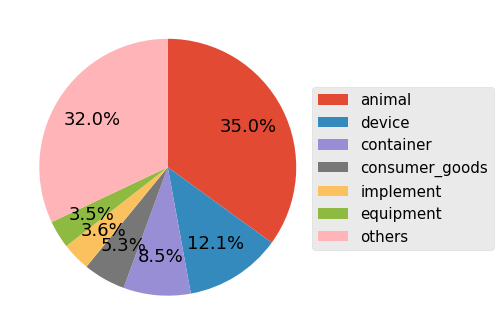

In [21]:
plt.rcParams["font.size"] = 18
fig = plt.figure(figsize=(9,5))
wedges, texts, autotexts = plt.pie(filtered_sorted_count, startangle=90, counterclock=False, autopct="%.1f%%", pctdistance=0.7, textprops={'color': "black"})
plt.legend(wedges, filtered_sorted_idx, bbox_to_anchor=(0.95, 0.75), loc='upper left', borderaxespad=0, fontsize=15)
plt.tight_layout()
plt.savefig("wordnet_7th_hierarchy.png")

In [18]:
wordnet_7th_hierarchy_df = pd.DataFrame({"label": filtered_sorted_idx, "count": filtered_sorted_count})

In [19]:
wordnet_7th_hierarchy_df

,label,count
0,animal,401
1,device,139
2,container,97
3,consumer_goods,61
4,implement,41
5,equipment,40
6,others,367


# Insect percentage in Animal

In [22]:
wordnet_invertebrate = []
wordnet_arthropod = []
wordnet_insects = []
for class_id in df["id"]:
    hn_list = GetHypernymsList(class_id)
    if len(hn_list) > 10:
        if str(hn_list[6].lemmas()[0].name()) == "animal":
            if str(hn_list[7].lemmas()[0].name()) == "invertebrate":
                wordnet_invertebrate.append(hn_list[7])
                if str(hn_list[8].lemmas()[0].name()) == "arthropod":
                    wordnet_arthropod.append(hn_list[8])
                    if str(hn_list[9].lemmas()[0].name()) == "insect":
                        wordnet_insects.append(hn_list[9])

In [23]:
len(wordnet_invertebrate)

52

In [24]:
len(wordnet_arthropod)

45

In [25]:
len(wordnet_insects)

27

In [26]:
animal_num = int(wordnet_7th_hierarchy_df[wordnet_7th_hierarchy_df["label"] == "animal"]["count"])

In [27]:
insect_percentage_df = pd.DataFrame({"invertebrate": [len(wordnet_invertebrate)/animal_num], "arthropod": [len(wordnet_arthropod)/animal_num], "insects": [len(wordnet_insects)/animal_num]}, index=["percentage"])

In [28]:
insect_percentage_df

,invertebrate,arthropod,insects
percentage,0.129676,0.112219,0.067332
